In [1]:
# v1.3 ARIMA ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù Î™®ÌòïÏúºÎ°ú ÏòàÏ∏°ÌïòÍ∏∞. (ÌïòÎ£®Îã®ÏúÑÎ°ú Î≥¥Í∏∞)
# v1.2 ÏàòÏàòÎ£å Í∏∞Î∞ò Î∞±ÌÖåÏä§ÌåÖ ÏûëÏóÖ, AI Ïù¥Ïö©Ìïú upper, lower ÏòàÏ∏°(Î∂ÑÎ•òÎ™®Îç∏ + gridcvÎ°ú ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï), ÏΩîÎìú Ï†ïÎ¶¨ 
# v1.1 ÌôïÎåÄ Ï∂ïÏÜåÍ∞Ä ÏïÑÎãå Low, UpperÏóê ÎãøÏùÑ Í≤ΩÏö∞ Îß§Ïàò, Îß§ÎèÑ Í≤∞Ï†ï, 5Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ† Í∏∞Ï§Ä
# v1.0 Î≥ºÎ¶∞Ï†Ä Î∞¥Îìú (ÌôïÎåÄ, Ï∂ïÏÜå)Î•º Ïù¥Ïö©Ìïú ÏïåÍ≥†Î¶¨Ï¶ò Îß§Ïàò, Îß§ÎèÑ Í≤∞Ï†ï

import pandas as pd
import numpy as np
import pyupbit
import datetime
import time
import os

# # min_key numbers
# access_key='WNlqEotmOTIxYKvgtrQupedaI1g0E4n8ultRrTMeUxAa' # key encrypt
# secret_key='91I4c67FhA88yRLTCuYp7D3N3p1h6Tc0jOEVd0x302R1' # key encrypt

# jiwoo numbers
access_key='RxxAtjdh5TCBv4Wc9ycWKILVBsDhE31Z0e4i8JVXadxF' # key encrypt
secret_key='xavsrBGokR5fqeivyA4ctxFrJgM3f3j1b6CCJmxRY5I5' # key encrypt

upbit=pyupbit.Upbit(access_key,secret_key) # upbit Ìï®Ïàò Ïù¥Ïö©ÌïòÍ∏∞

# Ï¥àÍ∏∞ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ≤ú
def start_settings(tickers):
    # 1ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ ÌôïÎ≥¥
    time2=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:00')
    data = pyupbit.get_ohlcv(tickers, interval="minute1", count=60, to=time2) # 60Î∂Ñ Ï∂îÏ∂ú
    i=1
    while(i<2): # Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏû•ÌïòÍ∏∞  (1ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú)
            date = data.index[0]
            data2 = pyupbit.get_ohlcv(tickers, interval="minute1", count=30, to=date)
            data = pd.concat([data,data2], axis=0)  
            data = data.sort_index()
            i+=1
            time.sleep(1)
    return data

# Data ÌôïÎ≥¥
def settings(tickers):
    # 24ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ ÌôïÎ≥¥
    time2=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:00')
    data = pyupbit.get_ohlcv(tickers, interval="minute1", count=5, to=time2)  # 120Î∂Ñ Ï∂îÏ∂ú
    i=1
    while(i<73): # Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏû•ÌïòÍ∏∞  (24ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú) # 3ÏùºÏπò
            date = data.index[0]
            data2 = pyupbit.get_ohlcv(tickers, interval="minute3", count=5, to=date)
            data = pd.concat([data,data2], axis=0)  
            data = data.sort_index()
            i+=1
            time.sleep(1)
    return data

# Î≥ºÎ¶∞Ï†ÄÎ∞¥Îìú ÎßåÎì§Í∏∞(upper, middle, lower)
def BAND_data(df):
    
    #Ï¢ÖÍ∞ÄÎ•º Ïù¥Ïö©
    df['line_5']=df['open'].rolling(window=5).mean() # 5Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ†
    df['line_10']=df['open'].rolling(window=10).mean() # 10Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ†
    df['band_mid']=df['open'].rolling(window=20).mean() # 20Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ†
    df['band_up']=df['band_mid']+(df['open'].rolling(window=20).std()*2)  # upper
    df['band_low']=df['band_mid']-(df['open'].rolling(window=20).std()*2)  # lower
    df=df.fillna(0) # ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ Ï±ÑÏö∞Í∏∞
    return df

#ÏñëÎ¥â, ÏùåÎ¥â Ï∫îÎì§ ÏÉùÏÑ±
def minute_1(temp_df, i):
    blue_b_price=0
    blue_t_price=0
    blue=0
    red_b_price=0
    red_t_price=0
    red=0
    # ÏùºÎ¥â Îß§Ïàò, Îß§ÎèÑ Ï†ê ÏúÑÏπò ÌååÏïÖ (Îπ®Í∞ÑÏÉâ, ÌååÎûÄÏÉâÏù∏ÏßÄ Íµ¨Î≥Ñ) -> Í∞ÄÍ≤© Î≥ÄÏàò ÏÑ§Ï†ï
    chai= (np.round(temp_df.loc[temp_df.index[i],'open'],0) - np.round(temp_df.loc[temp_df.index[i],'close'],0)).astype('float')
    if chai >= 0.0: # ÏùåÎ¥â
        blue_b_price=np.round(temp_df.loc[temp_df.index[i],'close'],0)
        blue_t_price=np.round(temp_df.loc[temp_df.index[i],'open'],0)
        blue=1
    else: #ÏñëÎ¥â
        red_b_price=np.round(temp_df.loc[temp_df.index[i],'open'],0)
        red_t_price=np.round(temp_df.loc[temp_df.index[i],'close'],0)   
        red=1
        
    return blue_b_price, blue_t_price, blue, red_b_price, red_t_price, red

# Î≥ºÎ¶∞Ï†Ä Î∞¥ÎìúÎ•º Ïù¥Ïö©Ìïú Îß§Ïàò Îß§ÎèÑ ÎàÑÏ†Å ÏàòÏùµÎ•† test Ìï®Ïàò
def band_trainig(temp_df):
    temp_df['B/S']=0  # buy=1, sell=-1
    sign=0  # Îß§Ïàò or Îß§ÎèÑ ÌÉÄÏù¥Î∞ç
    cnt=0 # Îß§Ïàò Í∞úÏàò
    
    for i in range(1,len(temp_df)):
        mid_price=temp_df.loc[temp_df.index[i],'band_mid']
        upper=temp_df.loc[temp_df.index[i],'band_up']
        lower=temp_df.loc[temp_df.index[i],'band_low']
        line_5=temp_df.loc[temp_df.index[i],'line_5']
        blue=0
        red=0
        
        # ÏùºÎ¥â Îß§Ïàò, Îß§ÎèÑ Ï†ê ÏúÑÏπò ÌååÏïÖ (Îπ®Í∞ÑÏÉâ, ÌååÎûÄÏÉâÏù∏ÏßÄ Íµ¨Î≥Ñ) -> Í∞ÄÍ≤© Î≥ÄÏàò ÏÑ§Ï†ï
        blue_b_price, blue_t_price, blue, red_b_price, red_t_price, red = minute_1(temp_df, i)
            
        if blue==1 and upper<blue_t_price and mid_price<blue_t_price:   #Î∏îÎ£®Î¥â ÏÇ¨Ïù∏
            sign=-1 # Îß§ÎèÑ ÌÉÄÏù¥Î∞ç Î∞úÏÉù
        elif blue==1 and lower>blue_b_price and mid_price>blue_b_price: 
            sign=1 # Îß§Ïàò ÌÉÄÏù¥Î∞ç Î∞úÏÉù(1)
        elif red==1 and upper<red_t_price and mid_price<red_t_price:    #Î†àÎìúÎ¥â ÏÇ¨Ïù∏
            sign=-1 # Îß§ÎèÑ ÌÉÄÏù¥Î∞ç Î∞úÏÉù(-1)
        elif red==1 and lower>red_b_price and mid_price>red_b_price:
            sign=1 # Îß§Ïàò ÌÉÄÏù¥Î∞ç Î∞úÏÉù
        
        if sign==-1: # ÏãúÍ∑∏ÎÑê ÏßÄÏÜçÌïòÎ©∞ Í∫æÎäîÏ†ê Î∞úÏÉù (ÏßÑÏ†ïÌïú Îß§ÎèÑ ÌÉÄÏù¥Î∞ç)
            if blue==1 and blue_t_price<line_5 and mid_price<blue_b_price and cnt>0: # Í≥†Ï†êÌòïÏÑ± Í∏∞Ï§Ä Î∏îÎ£®Î¥âÏùºÏãú Îß§ÎèÑ
                temp_df.loc[temp_df.index[i],'B/S']=-1   # Îß§ÎèÑÌïúÎã§. 
                cnt=0
                sign=0

            elif red==1 and red_t_price<line_5 and mid_price<red_b_price and cnt>0: # Í≥†Ï†êÌòïÏÑ± Í∏∞Ï§Ä Î†àÎìúÎ¥âÏùºÏãú Îß§ÎèÑ
                temp_df.loc[temp_df.index[i],'B/S']=-1   # Îß§ÎèÑÌïúÎã§. 
                cnt=0
                sign=0
                
        elif sign==1: # ÏãúÍ∑∏ÎÑê ÏßÄÏÜçÌïòÎ©∞ Í∫æÎäîÏ†ê Î∞úÏÉù (ÏßÑÏ†ïÌïú Îß§Ïàò ÌÉÄÏù¥Î∞ç)
            if red==1 and mid_price>red_b_price and red_b_price>line_5: # Ï†ÄÏ†êÌòïÏÑ± Í∏∞Ï§Ä Î†àÎìúÎ¥âÏùºÏãú Îß§Ïàò (Î†àÎìúÎ¥âÏùºÏãúÎßå Îß§Ïàò!! (ÌïµÏã¨))
                temp_df.loc[temp_df.index[i],'B/S']=1   # Îß§ÏàòÌïúÎã§. 
                cnt+=1
                sign=0
    return temp_df

#ÎàÑÏ†ÅÏàòÏùµÎ•† Í≥ÑÏÇ∞ Ìï®Ïàò
def test_rate(temp_df):
    price=0
    cnt=0 # Ï≤òÏùå Í∞úÏàò
    sell_rate=[] # Í∏∞Í∞ÑÎ≥Ñ ÏàòÏùµÎ•†
    cnt_sum=[]
    total_rate=1
    fee=0.0005  # upbit ÏàòÏàòÎ£å Í≥†Î†§
    for i in range(1,len(temp_df)):
        # ÏùºÎ¥â Îß§Ïàò, Îß§ÎèÑ Ï†ê ÏúÑÏπò ÌååÏïÖ (Îπ®Í∞ÑÏÉâ, ÌååÎûÄÏÉâÏù∏ÏßÄ Íµ¨Î≥Ñ) -> Í∞ÄÍ≤© Î≥ÄÏàò ÏÑ§Ï†ï
        blue_b_price, blue_t_price, blue, red_b_price, red_t_price, red = minute_1(temp_df, i)
        
        if temp_df.loc[temp_df.index[i],'B/S']==1 and red==1:   # Îß§ÏàòÎäî ÏãúÍ∞ÄÎ°ú Îß§ÏàòÌïúÎã§. (redÏùºÏãúÎßå Îß§Ïàò)
            price=(price+(red_b_price*(1.0+fee))) # redÏùº Ïãú ÏïÑÎû´ Î∂ÄÎ∂Ñ
            cnt+=1
        elif temp_df.loc[temp_df.index[i],'B/S']==-1 and cnt>0  and (blue==1 or red==1): # Îß§ÎèÑ
            if blue==1:  # Î∏îÎ£®ÏùºÏãú Ïúó Î∂ÄÎ∂Ñ
                sell_p=(blue_t_price*cnt*(1.0-fee))
            elif red==1: # Î†àÎìúÏùºÏãú Ïúó Î∂ÄÎ∂Ñ
                sell_p=(red_t_price*cnt*(1.0-fee))
            rate=np.round(((sell_p-price)/price),4)
            sell_rate.append(rate)
            cnt_sum.append(cnt)
            price=0
            cnt=0
    # Ï¥ù ÎàÑÏ†ÅÏàòÏùµÎ•†
    try:
        for rate in sell_rate:
            total_rate*=(1+rate)
        total_rate-=1
        total_rate=np.round(total_rate*100,5)
        if len(cnt_sum)!=0:
            cnt_max=max(cnt_sum)
        else:
            cnt_max=0
    except:
        cnt_max='error'
        total_rate='error'
    return total_rate, cnt_max

def not_trade(tickers, time2): # ÎØ∏Ï≤¥Í≤∞Îêú Ï£ºÎ¨∏ Ï∑®ÏÜå
    ret=upbit.get_order(tickers, state='wait')
    i=0
    while len(ret)!=0:
        ret=upbit.get_order(tickers)
        uuid=ret.pop(0)['uuid']
        ret2=upbit.cancel_order(uuid)
        print('{0} ÎØ∏Ï≤¥Í≤∞Îêú Ï£ºÎ¨∏ {2} Ï§ë {1}ÏõêÏù¥ Ï∑®ÏÜåÎêòÏóàÏäµÎãàÎã§.'.format(time2,ret2['price'],tickers[4:]))
        i+=1

def buy_trade(tickers, time2, cnt, buy_cnt): #Îß§Ïàò Ìï®Ïàò
    try:
        ret=upbit.get_balances()
        check=0
        for name in ret:
            if name['currency']==tickers[4:]:  # ÏûîÍ≥†Ïóê ÏûàÎäî Îß§ÏàòÍ∞Ä ÌôïÏù∏
                if float(name['avg_buy_price'])>price:
                    check=0
                else:
                    check=1
        price=pyupbit.get_current_price(tickers)
        if check==1:
            print('ÏûîÍ≥†Ïóê ÏûàÎäî ÌèâÍ∑†Í∞Ä {0}ÏõêÏù¥ Ï£ºÎ¨∏Í∞ÄÍ≤© {1}ÏõêÎ≥¥Îã§ ÎÇÆÏïÑ Îß§Ïàò Ï£ºÎ¨∏Ïù¥ Ï∑®ÏÜåÎêòÏóàÏäµÎãàÎã§.'.format(name['avg_buy_price'],price))
        else: 
            ret = upbit.buy_market_order(tickers, price*buy_cnt) # ÏãúÏû•Í∞Ä Îß§ÏàòÎ•º Í∞ÄÍ≤©ÏúºÎ°ú ÌïúÎã§.
            cnt+=1
            print('{1} ÏúºÎ°ú {2}Îäî {0}ÏõêÏúºÎ°ú ÌòÑÏû¨ {4}{3}Î•º Îß§Ïàò Ï£ºÎ¨∏ ÏôÑÎ£åÌñàÏäµÎãàÎã§.'.format(price,time2,tickers,tickers[4:],buy_cnt)) 
        return cnt, price
    except:
        print(ret)
        return cnt, price

def sell_trade(tickers, time2, cnt, buy_cnt): #Îß§ÎèÑ Ìï®Ïàò   
    try:
        ret=upbit.get_balances()
        for name in ret:
            if name['currency']==tickers[4:]:  # ÏûîÍ≥†Ïóê ÏûàÎäî Îß§ÏàòÌèâÍ∑†Í∞Ä ÏÑúÏπ≠
                avg_buy_price=float(name['avg_buy_price'])
                ret = upbit.sell_market_order(tickers, buy_cnt*cnt)
                price=pyupbit.get_current_price(tickers)
                while True:
                    if len(upbit.get_order(tickers, state='wait'))==0:
                        print('{1} Í∏∞Ï§ÄÏúºÎ°ú {2}Îäî {0}ÏõêÏúºÎ°ú Ï£ºÎ¨∏({3}) ÎßåÌÅº Îß§ÎèÑ ÏôÑÎ£åÌñàÏäµÎãàÎã§.'.format(price,time2,tickers[4:],buy_cnt))
                        avg_price=np.round(((price-avg_buy_price)/avg_buy_price*100),2)
                        print('{0} ÏàòÏùµÎ•†ÏùÄ {1}% ÏûÖÎãàÎã§.'.format(time2,avg_price))
                        cnt=0
                        break
        return cnt, price
    except:
        print(ret)
        return cnt, price

# Îß§Ïàò or Îß§ÎèÑ ÌîÑÎ°úÍ∑∏Îû®
def trade(tickers, df, buy_cnt, sign, cnt): # sign=Îß§Ïàò or Îß§ÎèÑ ÌÉÄÏù¥Î∞ç # band_trainig ÏóêÏÑú Í≤∞Ï†ïÎêú signal Í∞í
    
    #ÏµúÏã†Îç∞Ïù¥ÌÑ∞ band ÌòïÏÑ±
    df=BAND_data(df)
    line_5=df.loc[df.index[-1],'line_5']
    line_10=df.loc[df.index[-1],'line_5']
    upper=df.loc[df.index[-1],'band_up']
    lower=df.loc[df.index[-1],'band_low']
    df.loc[df.index[-1],'B/S']=0
    blue=0
    red=0
    sell_check=0
    
    # ÏùºÎ¥â Îß§Ïàò, Îß§ÎèÑ Ï†ê ÏúÑÏπò ÌååÏïÖ (Îπ®Í∞ÑÏÉâ, ÌååÎûÄÏÉâÏù∏ÏßÄ Íµ¨Î≥Ñ) -> Í∞ÄÍ≤© Î≥ÄÏàò ÏÑ§Ï†ï
    blue_b_price, blue_t_price, blue, red_b_price, red_t_price, red = minute_1(df, -1)
    
    #Î≥ÄÏàò ÏÑ§Ï†ï
    price=pyupbit.get_current_price(tickers)  #ÌòÑÏû¨ Í∞ÄÍ≤©
    time2=df.index[-1]  #ÏãúÍ∞Ñ
    avg_buy_price=0.0
    avg_price=0.0
    
    #bandÏóê Îî∞Î•∏ Îß§Ïàò or Îß§ÎèÑ Í≤∞Ï†ï
    mid_price=df.loc[df.index[-1],'band_mid']
    
    # signal Î∞úÏÉù
    if blue==1 and upper<blue_t_price and mid_price<blue_t_price:   #Î∏îÎ£®Î¥â ÏÇ¨Ïù∏
        sign=-1 # Îß§ÎèÑ ÌÉÄÏù¥Î∞ç Î∞úÏÉù
    elif blue==1 and lower>blue_b_price and mid_price>blue_b_price: 
        sign=1 # Îß§Ïàò ÌÉÄÏù¥Î∞ç Î∞úÏÉù(1)
    elif red==1 and upper<red_t_price and mid_price<red_t_price:    #Î†àÎìúÎ¥â ÏÇ¨Ïù∏
        sign=-1 # Îß§ÎèÑ ÌÉÄÏù¥Î∞ç Î∞úÏÉù(-1)
    elif red==1 and lower>red_b_price and mid_price>red_b_price:
        sign=1 # Îß§Ïàò ÌÉÄÏù¥Î∞ç Î∞úÏÉù
    
    if sign==-1 and cnt>0: # ÏãúÍ∑∏ÎÑê ÏßÄÏÜçÌïòÎ©∞ Í∫æÎäîÏ†ê Î∞úÏÉù (ÏßÑÏ†ïÌïú Îß§ÎèÑ ÌÉÄÏù¥Î∞ç)
        if blue==1 and blue_t_price<line_5 and mid_price<blue_b_price: # Í≥†Ï†êÌòïÏÑ± Í∏∞Ï§Ä Î∏îÎ£®Î¥âÏùºÏãú Îß§ÎèÑ
            df.loc[df.index[-1],'B/S']=-1   # Îß§ÎèÑÌïúÎã§. 
            cnt, price = sell_trade(tickers, time2, cnt, buy_cnt) # ÏãúÏû•Í∞Ä Îß§ÎèÑ
            sign=0
            sell_check=1

        elif red==1 and red_t_price<line_5 and mid_price<red_b_price: # Í≥†Ï†êÌòïÏÑ± Í∏∞Ï§Ä Î†àÎìúÎ¥âÏùºÏãú Îß§ÎèÑ
            df.loc[df.index[-1],'B/S']=-1   # Îß§ÎèÑÌïúÎã§. 
            cnt, price = sell_trade(tickers, time2, cnt, buy_cnt) # ÏãúÏû•Í∞Ä Îß§ÎèÑ
            sign=0
            sell_check=1
            
        else:
            print('{1} Í∏∞Ï§ÄÏúºÎ°ú {2}Îäî {0}ÏõêÏúºÎ°ú ÌòÑÏû¨ Î≥¥Î•òÏ§ëÏûÖÎãàÎã§.(signal Î≥¥Î•ò Ï§ë)'.format(price,time2,tickers))

    elif sign==1: # ÏãúÍ∑∏ÎÑê ÏßÄÏÜçÌïòÎ©∞ Í∫æÎäîÏ†ê Î∞úÏÉù (ÏßÑÏ†ïÌïú Îß§Ïàò ÌÉÄÏù¥Î∞ç)
        if red==1 and mid_price>red_b_price and red_b_price>line_5: # Ï†ÄÏ†êÌòïÏÑ± Í∏∞Ï§Ä Î†àÎìúÎ¥âÏùºÏãú Îß§Ïàò (Î†àÎìúÎ¥âÏùºÏãúÎßå Îß§Ïàò!! (ÌïµÏã¨))
            df.loc[df.index[-1],'B/S']=1   # Îß§ÏàòÌïúÎã§. 
            cnt, price = buy_trade(tickers, time2, cnt, buy_cnt)  # ÏãúÏû•Í∞Ä Îß§Ïàò
            sign=0
            
        else:
            print('{1} Í∏∞Ï§ÄÏúºÎ°ú {2}Îäî {0}ÏõêÏúºÎ°ú ÌòÑÏû¨ Î≥¥Î•òÏ§ëÏûÖÎãàÎã§.(signal Î≥¥Î•ò Ï§ë)'.format(price,time2,tickers))
    
    else:
        print('{1} Í∏∞Ï§ÄÏúºÎ°ú {2}Îäî {0}ÏõêÏúºÎ°ú ÌòÑÏû¨ Î≥¥Î•òÏ§ëÏûÖÎãàÎã§.'.format(price,time2,tickers))
        
    return sign, cnt, df, sell_check
        
# Î∞òÎ≥µ Ìï®Ïàò ÏÑ§Ï†ï
def repeat_module(tickers, band_df, start_rate, buy_cnt):
    sign=0   # band Î∞úÏÉù ÌëúÏãú Ïó¨Î∂Ä
    cnt=0    # Ï§ëÎ≥µ Îß§Ïàò Ïó¨Î∂Ä
    while True:
        try:
            time2=datetime.datetime.now()
            if time2.second==1:
                time2=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:00')
                not_trade(tickers, time2)  # ÎØ∏Ï≤¥Í≤∞Îêú Ï£ºÎ¨∏ Ï∑®ÏÜå
                temp = pyupbit.get_ohlcv(tickers, interval="minute1", count=1, to=time2)
                time.sleep(1)
                band_df=pd.concat([band_df,temp], axis=0)
                band_df.drop([band_df.index[0]], inplace=True)
                sign, cnt, band_df, sell_check=trade(tickers, band_df, buy_cnt, sign, cnt)
                rate, cnt_max = test_rate(band_df)
                #print("Í∞úÎ∞úÏûê Ï†ÑÏö©: test= {0}%".format(rate))
                if rate<0 and sell_check==1:  # ÏòàÏÉÅ ÏàòÏùµÎ•†Ïù¥ ÏùåÏàòÏù¥Î©¥ÏÑú Îß§ÎèÑÌïú ÏßÅÌõÑ Ïù∏Í≤ΩÏö∞ ÏàòÏùµÎ•† Ï°∞Ï†ï
                    print("-----------------Program Pause------------------------")
                    print("   ÏòàÏÉÅÏàòÏùµÎ•† ÌóàÏö©Î≤îÏúÑ Î≤óÏñ¥ÎÇò ÏãúÏä§ÌÖú Ïû¨Í∞ÄÎèô ÌïÑÏöî      ")
                    print("                                                      ")
                    print("   ÌòÑÏû¨ Îß§ÏàòÎêòÏñ¥ ÏûàÎäî ÏàòÎüâ: {0}Í∞ú".format(cnt))
                    print("-----------------Program Pause------------------------")
                    tickers, band_df, start_rate, buy_cnt=slot_setting(0,tickers)

        except KeyboardInterrupt:   # Î¨¥ÌïúÎ∞òÎ≥µ Ï¢ÖÎ£å
            print("-------------------------Program Pause-------------------------")
            print("       Ï§ëÎ≥µ ÌÇ§ ÏûÖÎ†•ÏúºÎ°ú ÏãúÏä§ÌÖú Ï§ëÏßÄ Î∞è Ï¥àÍ∏∞ÌôîÎ©¥ Ïù¥Îèô           ")
            print("                                                               ")
            print("       ÌòÑÏû¨ Îß§ÏàòÎêòÏñ¥ ÏûàÎäî ÏàòÎüâ: {0}Í∞ú".format(cnt))
            print("-------------------------Program Pause-------------------------")
            os.system("pause")
            os.system("cls")
            tickers, band_df, start_rate, buy_cnt=slot_setting(0,tickers)
            
# Ï¥àÍ∏∞ Ïã§Ìñâ Ïãú 1ÏãúÍ∞Ñ ÏàòÏùµÎ•†Ïù¥ ÎÜíÏùÄ Í≤É top10 Ï¢ÖÎ™© ÏÑ†Ï†ï
def choose_select(tickers_list):
    dic_rate={}
    for coin in tickers_list:
        data=start_settings(coin)
        data=BAND_data(data)
        data=band_trainig(data)
        temp_rate, cnt_max=test_rate(data)
        dic_rate[coin]=np.round(temp_rate,2)
    df_rate=pd.DataFrame(list(dic_rate.items()), columns=['coin','rate'])
    df_rate=df_rate.sort_values(by='rate', ascending=False).reset_index(drop=True)
    df_rate=df_rate[:10]
    return df_rate

# Ï¥àÍ∏∞ Ïã§ÌñâÌï®Ïàò
def start():
    tickers_list = pyupbit.get_tickers(fiat="KRW")
    print("")
    print("-----------Upbit Coin Auto control Program------------------------")
    print("|  Version. 1.2                                                  |")
    print("|                                                                |")
    print("|  ÏΩîÏù∏Î™Ö ÏûëÏÑ±Î≤ï: 'KRW-<ÏΩîÏù∏Î™Ö>'                                 |")
    print("|                                  ex) KRW-EOS  (Ïù¥Ïò§Ïä§)         |")
    print("|  Ï∞∏Í≥†) ÌîÑÎ°úÍ∑∏Îû®ÏùÄ Îß§ 1Î∂ÑÎßàÎã§ Ïä§Ïä§Î°ú ÏûëÎèôÌï©ÎãàÎã§.                |")
    print("|  Ï∞∏Í≥†2) Ïã§ÌñâÎèÑÏ§ë Ï¥àÍ∏∞ÌôîÎ©¥ Ïù¥ÎèôÏùÑ ÏõêÌï† Í≤ΩÏö∞ Ctrl+C ÏûÖÎ†•         |")
    print("|  Ï∞∏Í≥†3) ÏòàÏÉÅÏàòÏùµÎ•†ÏùÄ ÎàÑÏ†ÅÏàòÏùµÎ•†Î°ú Í≥ÑÏÇ∞ÎêòÏóàÏäµÎãàÎã§.              |")
    print("|  Ï∞∏Í≥†4) ÏàòÏùµÎ•†ÏùÄ Í≥ºÍ±∞ 6ÏãúÍ∞Ñ DataÎ•º Í∏∞Î∞òÏúºÎ°ú ÏûëÏÑ±ÎêòÏóàÏäµÎãàÎã§.   |")
    print("----------------------------------------------made.by Lutto-------\n\n\n")
    money=np.round(upbit.get_balance("KRW"),0)
    choice=input("1ÏãúÍ∞Ñ ÏàòÏùµÎ•† Ï§ë Top 10 Ï¢ÖÎ™© ÏÑ†Ï†ïÏù¥ ÌïÑÏöîÌïòÏãúÎÇòÏöî? (3Î∂ÑÏù¥ÏÉÅ ÏÜåÏöî)   [y / n]  ")
    if choice=='y':
        df=choose_select(tickers_list)
        print("   Ï¢ÖÎ™©Î™Ö\t\t\t1ÏãúÍ∞Ñ ÏàòÏùµÎ•†")
        for i in range(len(df)):
            print("  {0}\t\t\t  {1}%".format(df.loc[i,'coin'],df.loc[i,'rate']))
        print(" ")
        
    print(f'ÌòÑÏû¨ ÏûîÍ≥† : {money} won')
    Coin=input("Select User Coin: ")
    if Coin in tickers_list:
        print('\n',Coin,'is checked')
        current=datetime.datetime.now()
        print("ÌòÑÏû¨ Ï†ëÏÜç ÏãúÍ∞Ñ:{0}".format(current.strftime("%Y-%m-%d %H:%M")))
        time.sleep(2)
        return Coin
    else:
        print("ÏûòÎ™ªÎêú ÏΩîÏù∏Î™ÖÏùÑ ÏûÖÎ†•ÌñàÏäµÎãàÎã§. ÏΩîÏù∏Î™ÖÏùÑ ÏïÑÎûòÏóêÏÑú ÌôïÏù∏ ÌõÑ ÏõêÌïòÎäî Í≤ÉÏùÑ Í≥®Îùº ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.")
        display(tickers_list)
        os.system("pause")
        os.system("cls")
        Coin=start()
        return Coin

#Ï¥àÍ∏∞Ìôî Ìï®Ïàò
def slot_setting(dummy,tickers):
    if dummy==0:   # ÏòàÏÉÅ ÏàòÏùµÎ•†Ïùò Í∑πÏã¨Ìïú Î≥ÄÎèôÏúºÎ°ú Ï¥àÍ∏∞Ìôî ÏÑ∏ÌåÖ ÏßÑÌñâÌï† Í≤ΩÏö∞
        tickers =start()
        present_p=pyupbit.get_current_price(tickers)
        limit_order=np.round(5000/present_p,4)
        print("{0} ÌòÑÏû¨ Í∞ÄÍ≤© : {1}Ïõê, ÏµúÏÜå Ï£ºÎ¨∏ ÏöîÍµ¨ ÏΩîÏù∏ ÏàòÎüâ: {2}Í∞ú Ïù¥ÏÉÅ".format(tickers, present_p, limit_order))
        buy_cnt=float(input("ÌïúÎ≤à Îß§ÏàòÏãú Íµ¨Îß§Ìï† ÏΩîÏù∏ ÏàòÎüâ: "))
        
    print("==================== Ï¥àÍ∏∞Ìôî ÏÑ∏ÌåÖ ÏßÑÌñâ ====================")
    print("  0. Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±:   ",end='')
    data = settings(tickers)
    print(" CLEAR")
    print("  1. 6ÏãúÍ∞Ñ ÏÇ¨Ïö© Ïãú ÏòàÏÉÅ ÏàòÏùµÎ•†:   ",end='')
    band_df=BAND_data(data)
    band_df=band_trainig(band_df)
    rate, cnt_max=test_rate(band_df)   #6ÏãúÍ∞Ñ Í∏∞Ï§Ä signal ÏÇ¨Ïö©
    print(" {0}%".format(rate))
    print("  2. 1ÏãúÍ∞Ñ ÏÇ¨Ïö© Ïãú ÏòàÏÉÅ ÏàòÏùµÎ•†:   ",end='')
    #band_df.to_csv('test.csv')
    temp_df = band_df[(len(band_df)-60):]  # 1ÏãúÍ∞Ñ ÏòàÏÉÅ ÏàòÏùµÎ•†
    rate2, cnt_max2=test_rate(temp_df)
    print(" {0}%".format(rate2))
    print("  3. 1ÏãúÍ∞Ñ ÏÇ¨Ïö© Ïãú Ï§ëÎ≥µ Îß§Ïàò ÏµúÎåÄ ÌöüÏàò:  {0}Î≤à".format(cnt_max2))
    print("==========================================================")
    time2=datetime.datetime.now()
    print("{0}Ï¥à ÌõÑ ÌîÑÎ°úÍ∑∏Îû® ÏãúÏûë".format(60-time2.second))
    return tickers, band_df, rate, buy_cnt
    
if __name__ == "__main__":
    dummy=0 # 0ÏùºÏãú ÏôÑÏ†Ñ ÏÉàÎ°ú ÏãúÏûë
#     try:
#         tickers, band_df, start_rate, buy_cnt=slot_setting(dummy,'')
#         repeat_module(tickers, band_df, start_rate, buy_cnt)
#     except:
#         print("Program Error")
#         os.system("pause")

In [2]:
import pandas as pd
import numpy as np
import pyupbit
import datetime
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle 

In [3]:
tickers_list = pyupbit.get_tickers(fiat="KRW")

In [4]:
len(tickers_list)

109

In [5]:
tickers_list[2]

'KRW-NEO'

In [6]:
def start_settings(tickers, time2, cnt, num):
    data = pyupbit.get_ohlcv(tickers, interval="minute5", count=cnt, to=time2) 
    i=1
    while(i<num): # Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏû•ÌïòÍ∏∞ 
            date = data.index[0]
            data2 = pyupbit.get_ohlcv(tickers, interval="minute5", count=cnt, to=date)
            data = pd.concat([data,data2], axis=0)  
            data = data.sort_index()
            i+=1
            time.sleep(1)
    return data

In [7]:
def start_settings2(tickers, time2, cnt, num):
    data = pyupbit.get_ohlcv(tickers, interval="minute10", count=cnt, to=time2) 
    i=1
    while(i<num): # Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏû•ÌïòÍ∏∞ 
            date = data.index[0]
            data2 = pyupbit.get_ohlcv(tickers, interval="minute10", count=cnt, to=date)
            data = pd.concat([data,data2], axis=0)  
            data = data.sort_index()
            i+=1
            time.sleep(1)
    return data

In [8]:
def start_settings3(tickers, time2, cnt, num):
    data = pyupbit.get_ohlcv(tickers, interval="minute15", count=cnt, to=time2) 
    i=1
    while(i<num): # Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏû•ÌïòÍ∏∞ 
            date = data.index[0]
            data2 = pyupbit.get_ohlcv(tickers, interval="minute15", count=cnt, to=date)
            data = pd.concat([data,data2], axis=0)  
            data = data.sort_index()
            i+=1
            time.sleep(1)
    return data

In [9]:
def start_settings4(tickers, time2, cnt, num):
    data = pyupbit.get_ohlcv(tickers, interval="minute30", count=cnt, to=time2) 
    i=1
    while(i<num): # Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏû•ÌïòÍ∏∞ 
            date = data.index[0]
            data2 = pyupbit.get_ohlcv(tickers, interval="minute30", count=cnt, to=date)
            data = pd.concat([data,data2], axis=0)  
            data = data.sort_index()
            i+=1
            time.sleep(1)
    return data

In [10]:
def BAND_data(df):
    
    #Ï¢ÖÍ∞ÄÎ•º Ïù¥Ïö©
    df['line_5']=df['open'].rolling(window=5).mean() # 5Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ†
    df['line_10']=df['open'].rolling(window=10).mean() # 10Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ†
    df['band_mid']=df['open'].rolling(window=20).mean() # 20Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ†
    df['band_up']=df['band_mid']+(df['open'].rolling(window=20).std()*2)  # upper
    df['band_low']=df['band_mid']-(df['open'].rolling(window=20).std()*2)  # lower
    df=df.fillna(0) # ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ Ï±ÑÏö∞Í∏∞
    return df

In [11]:
def settings_data(start_settings_get, tickers, start_time, cnt=200, num=20):
    data=start_settings_get(tickers, start_time, cnt, num)
    data=BAND_data(data)
    data=data[20:]
    
    # Ï¶ùÍ∞Ä Í∞êÏÜåÏú® ÌëúÏãú
    data['UD']=0
    for i in range(1,len(data.index)):
        idex=data.index[i]
        bidex=data.index[i-1]
        if data.loc[idex,'open']>data.loc[bidex,'open']:
            data.loc[idex,'UD']=1
    return data

In [12]:
start_time=datetime.datetime.now()
data=settings_data(start_settings, tickers_list[2], start_time)

In [15]:
data2=settings_data(start_settings2, tickers_list[2], start_time)

In [16]:
data3=settings_data(start_settings3, tickers_list[2], start_time)

In [252]:
data4=settings_data(start_settings4, tickers_list[2], start_time)

In [253]:
data.head()

open     high      low    close      volume  \
2021-12-26 23:40:00  35120.0  35210.0  35100.0  35200.0  233.376018   
2021-12-26 23:45:00  35210.0  35220.0  35110.0  35110.0  100.419194   
2021-12-26 23:50:00  35170.0  35190.0  35120.0  35180.0   35.839383   
2021-12-26 23:55:00  35180.0  35220.0  35140.0  35140.0  347.246597   
2021-12-27 00:00:00  35140.0  35240.0  35140.0  35190.0  313.419166   

                            value   line_5  line_10  band_mid       band_up  \
2021-12-26 23:40:00  8.208858e+06  35100.0  35124.0   35172.5  35324.105444   
2021-12-26 23:45:00  3.528351e+06  35120.0  35133.0   35172.5  35324.105444   
2021-12-26 23:50:00  1.260854e+06  35132.0  35137.0   35170.5  35321.074339   
2021-12-26 23:55:00  1.221797e+07  35154.0  35144.0   35166.5  35311.199325   
2021-12-27 00:00:00  1.103640e+07  35164.0  35134.0   35157.5  35283.135228   

                         band_low  UD  
2021-12-26 23:40:00  35020.894556   0  
2021-12-26 23:45:00  35020.894556   1  
2021-12-26 23:50:00  35019.925661   0  
2021-12-26 23:55:00  35021.800675   1  
2021-12-27 00:00:00  35031.864772   0

In [17]:
data2.head()

open     high      low    close      volume  \
2021-12-13 04:00:00  35130.0  35200.0  35060.0  35200.0  516.754552   
2021-12-13 04:10:00  35210.0  35210.0  35110.0  35140.0  229.633042   
2021-12-13 04:20:00  35130.0  35140.0  34870.0  35000.0  570.894858   
2021-12-13 04:30:00  35020.0  35110.0  35020.0  35110.0   33.494970   
2021-12-13 04:40:00  35110.0  35160.0  35070.0  35140.0  236.778829   

                            value   line_5  line_10  band_mid       band_up  \
2021-12-13 04:00:00  1.816529e+07  35126.0  35005.0   34793.5  35315.450794   
2021-12-13 04:10:00  8.073650e+06  35148.0  35045.0   34829.5  35362.514269   
2021-12-13 04:20:00  2.004004e+07  35154.0  35073.0   34861.0  35386.433155   
2021-12-13 04:30:00  1.175032e+06  35126.0  35089.0   34888.0  35385.767648   
2021-12-13 04:40:00  8.312908e+06  35120.0  35109.0   34920.5  35384.327327   

                         band_low  UD  
2021-12-13 04:00:00  34271.549206   0  
2021-12-13 04:10:00  34296.485731   1  
2021-12-13 04:20:00  34335.566845   0  
2021-12-13 04:30:00  34390.232352   0  
2021-12-13 04:40:00  34456.672673   1

In [18]:
data3.head()

open     high      low    close       volume  \
2021-11-29 09:00:00  48130.0  48230.0  47760.0  48160.0  3107.467140   
2021-11-29 09:15:00  48040.0  48180.0  47860.0  48110.0  3792.214870   
2021-11-29 09:30:00  48110.0  48180.0  47950.0  47950.0  4872.072954   
2021-11-29 09:45:00  47950.0  48000.0  47740.0  47810.0  3167.205414   
2021-11-29 10:00:00  48020.0  48120.0  47780.0  47870.0  6072.190341   

                            value   line_5  line_10  band_mid       band_up  \
2021-11-29 09:00:00  1.492296e+08  47952.0  47875.0   47434.0  48416.829428   
2021-11-29 09:15:00  1.818807e+08  48038.0  47917.0   47491.5  48474.883525   
2021-11-29 09:30:00  2.341332e+08  48090.0  47943.0   47559.5  48514.673724   
2021-11-29 09:45:00  1.515763e+08  48058.0  47947.0   47605.0  48542.510702   
2021-11-29 10:00:00  2.911200e+08  48050.0  47971.0   47652.0  48572.791422   

                         band_low  UD  
2021-11-29 09:00:00  46451.170572   0  
2021-11-29 09:15:00  46508.116475   0  
2021-11-29 09:30:00  46604.326276   1  
2021-11-29 09:45:00  46667.489298   0  
2021-11-29 10:00:00  46731.208578   1

In [254]:
data4.head()

open     high      low    close        volume  \
2021-10-18 21:00:00  52490.0  52690.0  52350.0  52350.0   3551.381813   
2021-10-18 21:30:00  52350.0  53200.0  52100.0  52220.0   5680.948862   
2021-10-18 22:00:00  52220.0  52500.0  51720.0  52500.0  16057.422604   
2021-10-18 22:30:00  52500.0  53070.0  52500.0  52930.0   5569.295133   
2021-10-18 23:00:00  53000.0  53020.0  52690.0  52790.0   4301.505074   

                            value   line_5  line_10  band_mid       band_up  \
2021-10-18 21:00:00  1.864519e+08  52604.0  52828.0   52829.0  53237.483717   
2021-10-18 21:30:00  2.975502e+08  52550.0  52757.0   52795.5  53245.785290   
2021-10-18 22:00:00  8.355893e+08  52490.0  52689.0   52761.5  53276.589159   
2021-10-18 22:30:00  2.935296e+08  52448.0  52637.0   52747.5  53275.530103   
2021-10-18 23:00:00  2.271942e+08  52512.0  52637.0   52765.0  53302.538248   

                         band_low  UD  
2021-10-18 21:00:00  52420.516283   0  
2021-10-18 21:30:00  52345.214710   0  
2021-10-18 22:00:00  52246.410841   0  
2021-10-18 22:30:00  52219.469897   1  
2021-10-18 23:00:00  52227.461752   1

In [20]:
tickers_list[2]

'KRW-NEO'

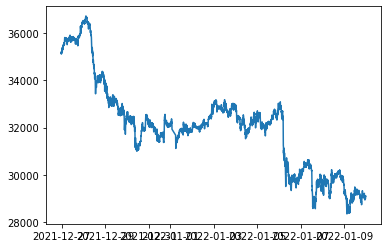

In [21]:
plt.plot(data.index, data['close'])

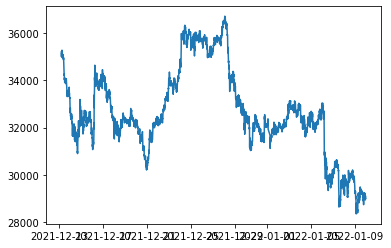

In [22]:
plt.plot(data2.index, data2['close'])

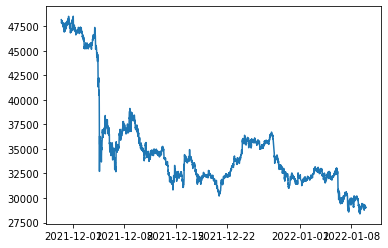

In [23]:
plt.plot(data3.index, data3['close'])

In [ ]:
plt.plot(data4.index, data4['close'])

In [13]:
from sklearn.preprocessing import MinMaxScaler

def minmaxscaler(data):
    scaler = MinMaxScaler()
    scale_cols = ['open','line_5','line_10','band_mid','band_up','band_low','UD']
    df_scaled = scaler.fit_transform(data[scale_cols])

    scaler_l = MinMaxScaler()
    scale_cols_l = ['close']
    df_scaled_l = scaler_l.fit_transform(data[scale_cols_l])

    df_scaled = pd.DataFrame(df_scaled)
    df_scaled.columns = scale_cols

    df_scaled_l = pd.DataFrame(df_scaled_l)
    df_scaled_l.columns = scale_cols_l
    print(df_scaled)
    print(df_scaled_l)
    return df_scaled, df_scaled_l, scaler, scaler_l

In [25]:
df_scaled, df_scaled_l, scaler, scaler_l = minmaxscaler(data)

          open    line_5   line_10  band_mid   band_up  band_low   UD
0     0.808153  0.806937  0.809768  0.816985  0.820547  0.809954  0.0
1     0.818945  0.809362  0.810867  0.816985  0.820547  0.809954  1.0
2     0.814149  0.810817  0.811355  0.816740  0.820175  0.809838  0.0
3     0.815348  0.813485  0.812210  0.816250  0.818964  0.810062  1.0
4     0.810552  0.814698  0.810989  0.815148  0.815521  0.811261  0.0
...        ...       ...       ...       ...       ...       ...  ...
3975  0.082734  0.070580  0.064469  0.069985  0.073090  0.082122  1.0
3976  0.074341  0.070580  0.064347  0.068699  0.070464  0.082171  0.0
3977  0.076739  0.071065  0.063858  0.067720  0.068265  0.082401  1.0
3978  0.082734  0.072035  0.064103  0.067352  0.067353  0.082572  1.0
3979  0.088729  0.073975  0.065690  0.067536  0.067844  0.082452  1.0

[3980 rows x 7 columns]
         close
0     0.819378
1     0.808612
2     0.816986
3     0.812201
4     0.818182
...        ...
3975  0.075359
3976  0.080144


In [26]:
df_scaled2, df_scaled_l2, scaler2, scaler_l2 = minmaxscaler(data2)

          open    line_5   line_10  band_mid   band_up  band_low   UD
0     0.809353  0.809687  0.796608  0.776528  0.811240  0.740961  0.0
1     0.818945  0.812378  0.801524  0.781027  0.817117  0.744003  1.0
2     0.809353  0.813112  0.804965  0.784964  0.820104  0.748770  0.0
3     0.796163  0.809687  0.806931  0.788339  0.820021  0.755437  0.0
4     0.806954  0.808953  0.809389  0.792401  0.819841  0.763541  1.0
...        ...       ...       ...       ...       ...       ...  ...
3975  0.068345  0.066047  0.070542  0.067992  0.060296  0.091531  0.0
3976  0.074341  0.060665  0.068084  0.067492  0.060754  0.090108  1.0
3977  0.079137  0.061644  0.066855  0.067554  0.060694  0.090288  1.0
3978  0.074341  0.061399  0.064274  0.065992  0.058765  0.089124  0.0
3979  0.082734  0.061888  0.063537  0.064867  0.056127  0.089505  1.0

[3980 rows x 7 columns]
         close
0     0.819378
1     0.812201
2     0.795455
3     0.808612
4     0.812201
...        ...
3975  0.081340
3976  0.081340


In [27]:
df_scaled3, df_scaled_l3, scaler3, scaler_l3 = minmaxscaler(data3)

          open    line_5   line_10  band_mid   band_up  band_low   UD
0     0.981123  0.982835  0.982880  0.966467  0.982162  0.932557  0.0
1     0.976652  0.987177  0.985014  0.969426  0.985105  0.935444  0.0
2     0.980129  0.989802  0.986335  0.972926  0.987122  0.940322  1.0
3     0.972181  0.988187  0.986538  0.975268  0.988533  0.943525  0.0
4     0.975658  0.987783  0.987757  0.977687  0.990068  0.946756  1.0
...        ...       ...       ...       ...       ...       ...  ...
3975  0.033780  0.030897  0.030734  0.020408  0.014834  0.036125  1.0
3976  0.028316  0.028574  0.029464  0.020202  0.014817  0.035737  0.0
3977  0.032290  0.027565  0.028905  0.020279  0.014853  0.035853  1.0
3978  0.030800  0.026454  0.028042  0.020537  0.014712  0.036500  0.0
3979  0.036761  0.027666  0.027991  0.021000  0.014955  0.037171  1.0

[3980 rows x 7 columns]
         close
0     0.982613
1     0.980129
2     0.972181
3     0.965226
4     0.968207
...        ...
3975  0.027819
3976  0.032290


In [255]:
df_scaled4, df_scaled_l4, scaler4, scaler_l4 = minmaxscaler(data4)

          open    line_5   line_10  band_mid   band_up  band_low   UD
0     0.680839  0.692782  0.698797  0.700057  0.666342  0.707408  0.0
1     0.676871  0.691226  0.696744  0.699078  0.666574  0.705219  0.0
2     0.673186  0.689498  0.694777  0.698085  0.667433  0.702347  0.0
3     0.681122  0.688288  0.693273  0.697676  0.667404  0.701564  1.0
4     0.695295  0.690132  0.693273  0.698188  0.668158  0.701796  1.0
...        ...       ...       ...       ...       ...       ...  ...
3975  0.020692  0.015611  0.011076  0.008821  0.003300  0.022177  1.0
3976  0.018707  0.017109  0.010961  0.008441  0.002428  0.022330  0.0
3977  0.015023  0.016936  0.010845  0.007959  0.001818  0.022005  0.0
3978  0.013605  0.015496  0.010614  0.007623  0.001783  0.021373  0.0
3979  0.015023  0.014517  0.010903  0.007185  0.001159  0.021151  1.0

[3980 rows x 7 columns]
         close
0     0.676396
1     0.672712
2     0.680646
3     0.692831
4     0.688864
...        ...
3975  0.018135
3976  0.014452


In [14]:
def make_dataset(data, label, window_size=30):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [15]:
from sklearn.model_selection import train_test_split

def feature(df_scaled, df_scaled_l, size=30):
    TEST_SIZE=200
    xtrain = df_scaled[:-TEST_SIZE]
    ytrain = df_scaled_l[:-TEST_SIZE]
    xtest = df_scaled[-TEST_SIZE:]
    ytest = df_scaled_l[-TEST_SIZE:]
    train_feature, train_label = make_dataset(xtrain, ytrain, size)
    x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
    test_feature, test_label = make_dataset(xtest, ytest, size)
    return x_train, x_valid, y_train, y_valid, test_feature, test_label, train_feature.shape[1], train_feature.shape[2]

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

def model_lstm(x_train, x_valid, y_train, y_valid, test_feature, test_label, shape1, shape2):
    model = Sequential()
    model.add(LSTM(16,
                   input_shape=(shape1, shape2), 
                   activation='elu', 
                   return_sequences=False)
              )
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='val_loss', patience=5)

    history = model.fit(x_train, y_train, 
                        epochs=100, 
                        batch_size=15,
                        verbose=0,
                        validation_data=(x_valid, y_valid), 
                        callbacks=[early_stop])
    return model

In [17]:
def model_predict(model, test_feature, test_label, scaler_l):
    pred = model.predict(test_feature)
    pred_price=scaler_l.inverse_transform(pred)
    test_price=scaler_l.inverse_transform(test_label)
    return pred_price, test_price

In [18]:
def mean_test(test_price,pred_price):
    mean_list=[]
    for i in range(len(test_price)):
        diff=abs(test_price[i]-pred_price[i])+test_price[i]
        mean_list.append(diff)
    mean_diff=abs(np.mean(mean_list)-np.mean(test_price))
    return np.round(mean_diff/np.mean(test_price)*1000,2)

In [19]:
def optimize_size(df_scaled, df_scaled_l, scaler_l):
    min_dic={}
    for k in tqdm(range(10,50)):
        x_train, x_valid, y_train, y_valid, test_feature, test_label, shape1, shape2 = feature(df_scaled, df_scaled_l, k)
        model = model_lstm(x_train, x_valid, y_train, y_valid, test_feature, test_label, shape1, shape2)
        pred_price, test_price = model_predict(model, test_feature, test_label, scaler_l)
        min_dic[k]=mean_test(test_price,pred_price)
        
    sort_dic=sorted(min_dic.items(), key=(lambda x:x[1]))
    print("Optimize key : ", sort_dic[0][0], ", Optimize rate : ", sort_dic[0][1])
    x_train, x_valid, y_train, y_valid, test_feature, test_label, shape1, shape2 = feature(df_scaled, df_scaled_l, sort_dic[0][0])
    model = model_lstm(x_train, x_valid, y_train, y_valid, test_feature, test_label, shape1, shape2)
    pred_price, test_price = model_predict(model, test_feature, test_label, scaler_l)
    
    return test_feature, model, pred_price, test_price, sort_dic[0][0], sort_dic

In [35]:
test_feature, model, pred_price, test_price, size_key, size_dic = optimize_size(df_scaled, df_scaled_l, scaler_l)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [16:34<00:00, 24.87s/it]


Optimize key :  32 , Optimize rate :  2.24


In [36]:
lst=[test_feature, model, pred_price, test_price, size_key, size_dic, scaler, scaler_l]
name=['test_feature', 'model', 'pred_price', 'test_price', 'size_key', 'size_dic', 'scaler', 'scaler_l']
for i in range(len(lst)):
    if i!=1:
        with open('./coin_data/'+name[i]+'.pickle','wb') as fw:
            pickle.dump(lst[i], fw)
    else:
        lst[i].save('./coin_data/'+name[i]+'.h5')

In [37]:
test_feature2, model2, pred_price2, test_price2, size_key2, size_dic2 = optimize_size(df_scaled2, df_scaled_l2, scaler_l2)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [17:38<00:00, 26.45s/it]


Optimize key :  12 , Optimize rate :  3.44


In [38]:
lst=[test_feature2, model2, pred_price2, test_price2, size_key2, size_dic2, scaler2, scaler_l2]
name=['test_feature2', 'model2', 'pred_price2', 'test_price2', 'size_key2', 'size_dic2', 'scaler2', 'scaler_l2']
for i in range(len(lst)):
    if i!=1:
        with open('./coin_data/'+name[i]+'.pickle','wb') as fw:
            pickle.dump(lst[i], fw)
    else:
        lst[i].save('./coin_data/'+name[i]+'.h5')

In [39]:
test_feature3, model3, pred_price3, test_price3, size_key3, size_dic3 = optimize_size(df_scaled3, df_scaled_l3, scaler_l3)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [16:08<00:00, 24.20s/it]


Optimize key :  49 , Optimize rate :  4.04


In [40]:
lst=[test_feature3, model3, pred_price3, test_price3, size_key3, size_dic3, scaler3, scaler_l3]
name=['test_feature3', 'model3', 'pred_price3', 'test_price3', 'size_key3', 'size_dic3', 'scaler3', 'scaler_l3']
for i in range(len(lst)):
    if i!=1:
        with open('./coin_data/'+name[i]+'.pickle','wb') as fw:
            pickle.dump(lst[i], fw)
    else:
        lst[i].save('./coin_data/'+name[i]+'.h5')

In [256]:
test_feature4, model4, pred_price4, test_price4, size_key4, size_dic4 = optimize_size(df_scaled4, df_scaled_l4, scaler_l4)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [14:53<00:00, 22.33s/it]


Optimize key :  38 , Optimize rate :  6.83


In [257]:
lst=[test_feature4, model4, pred_price4, test_price4, size_key4, size_dic4, scaler4, scaler_l4]
name=['test_feature4', 'model4', 'pred_price4', 'test_price4', 'size_key4', 'size_dic4', 'scaler4', 'scaler_l4']
for i in range(len(lst)):
    if i!=1:
        with open('./coin_data/'+name[i]+'.pickle','wb') as fw:
            pickle.dump(lst[i], fw)
    else:
        lst[i].save('./coin_data/'+name[i]+'.h5')

In [21]:
from keras.models import load_model
#valid_data, start_settings, tickers_list[6], scaler, scaler_l, model, test_feature, col[0], size_key+20, 1
name=['test_feature', 'model', 'pred_price', 'test_price', 'size_key', 'size_dic', 'scaler', 'scaler_l']
with open('./coin_data/'+name[0]+'.pickle', 'rb') as f: 
    test_feature = pickle.load(f)
with open('./coin_data/'+name[2]+'.pickle', 'rb') as f: 
    pred_price = pickle.load(f)
with open('./coin_data/'+name[3]+'.pickle', 'rb') as f: 
    test_price = pickle.load(f)
with open('./coin_data/'+name[4]+'.pickle', 'rb') as f: 
    size_key = pickle.load(f)
with open('./coin_data/'+name[5]+'.pickle', 'rb') as f: 
    size_dic = pickle.load(f)
with open('./coin_data/'+name[6]+'.pickle', 'rb') as f: 
    scaler = pickle.load(f)
with open('./coin_data/'+name[7]+'.pickle', 'rb') as f: 
    scaler_l = pickle.load(f)

model=load_model('./coin_data/'+name[1]+'.h5')

In [22]:
name=['test_feature2', 'model2', 'pred_price2', 'test_price2', 'size_key2', 'size_dic2', 'scaler2', 'scaler_l2']
with open('./coin_data/'+name[0]+'.pickle', 'rb') as f: 
    test_feature2 = pickle.load(f)
with open('./coin_data/'+name[2]+'.pickle', 'rb') as f: 
    pred_price2 = pickle.load(f)
with open('./coin_data/'+name[3]+'.pickle', 'rb') as f: 
    test_price2 = pickle.load(f)
with open('./coin_data/'+name[4]+'.pickle', 'rb') as f: 
    size_key2 = pickle.load(f)
with open('./coin_data/'+name[5]+'.pickle', 'rb') as f: 
    size_dic2 = pickle.load(f)
with open('./coin_data/'+name[6]+'.pickle', 'rb') as f: 
    scaler2 = pickle.load(f)
with open('./coin_data/'+name[7]+'.pickle', 'rb') as f: 
    scaler_l2 = pickle.load(f)


model2=load_model('./coin_data/'+name[1]+'.h5')

In [23]:
name=['test_feature3', 'model3', 'pred_price3', 'test_price3', 'size_key3', 'size_dic3', 'scaler3', 'scaler_l3']
with open('./coin_data/'+name[0]+'.pickle', 'rb') as f: 
    test_feature3 = pickle.load(f)
with open('./coin_data/'+name[2]+'.pickle', 'rb') as f: 
    pred_price3 = pickle.load(f)
with open('./coin_data/'+name[3]+'.pickle', 'rb') as f: 
    test_price3 = pickle.load(f)
with open('./coin_data/'+name[4]+'.pickle', 'rb') as f: 
    size_key3 = pickle.load(f)
with open('./coin_data/'+name[5]+'.pickle', 'rb') as f: 
    size_dic3 = pickle.load(f)
with open('./coin_data/'+name[6]+'.pickle', 'rb') as f: 
    scaler3 = pickle.load(f)
with open('./coin_data/'+name[7]+'.pickle', 'rb') as f: 
    scaler_l3 = pickle.load(f)

model3=load_model('./coin_data/'+name[1]+'.h5')

In [24]:
name=['test_feature4', 'model4', 'pred_price4', 'test_price4', 'size_key4', 'size_dic4', 'scaler4', 'scaler_l4']
with open('./coin_data/'+name[0]+'.pickle', 'rb') as f: 
    test_feature4 = pickle.load(f)
with open('./coin_data/'+name[2]+'.pickle', 'rb') as f: 
    pred_price4 = pickle.load(f)
with open('./coin_data/'+name[3]+'.pickle', 'rb') as f: 
    test_price4 = pickle.load(f)
with open('./coin_data/'+name[4]+'.pickle', 'rb') as f: 
    size_key4 = pickle.load(f)
with open('./coin_data/'+name[5]+'.pickle', 'rb') as f: 
    size_dic4 = pickle.load(f)
with open('./coin_data/'+name[6]+'.pickle', 'rb') as f: 
    scaler4 = pickle.load(f)
with open('./coin_data/'+name[7]+'.pickle', 'rb') as f: 
    scaler_l4 = pickle.load(f)

model4=load_model('./coin_data/'+name[1]+'.h5')

In [44]:
np.roll(test_price,1)

array([[29090.],
       [29170.],
       [29160.],
       [29130.],
       [29160.],
       [29060.],
       [29070.],
       [29020.],
       [28920.],
       [28960.],
       [29100.],
       [28990.],
       [29060.],
       [29010.],
       [29140.],
       [29170.],
       [29180.],
       [29260.],
       [29320.],
       [29350.],
       [29350.],
       [29310.],
       [29290.],
       [29390.],
       [29490.],
       [29400.],
       [29440.],
       [29330.],
       [29310.],
       [29290.],
       [29300.],
       [29330.],
       [29330.],
       [29250.],
       [29210.],
       [29180.],
       [29180.],
       [29140.],
       [29180.],
       [29180.],
       [29230.],
       [29270.],
       [29240.],
       [29250.],
       [29300.],
       [29320.],
       [29310.],
       [29330.],
       [29320.],
       [29340.],
       [29400.],
       [29390.],
       [29390.],
       [29340.],
       [29260.],
       [29200.],
       [29270.],
       [29210.],
       [29300.

In [45]:
test_price[20]

array([29310.])

In [46]:
pred_price[21]

array([29325.922], dtype=float32)

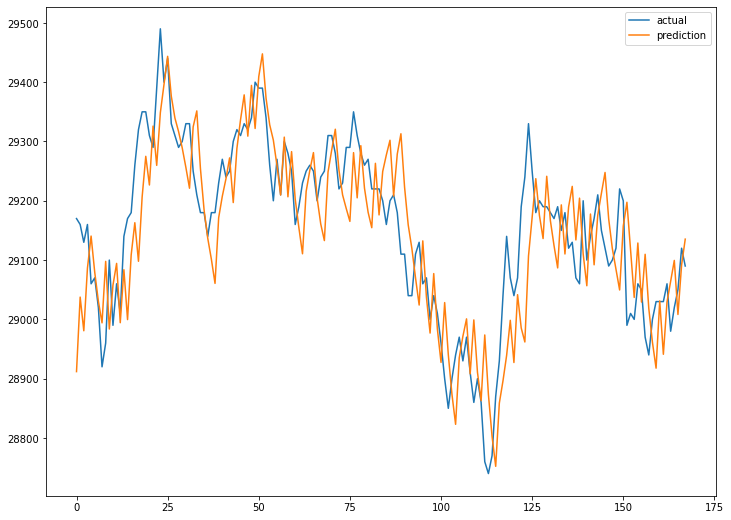

In [47]:
plt.figure(figsize=(12, 9))
plt.plot(test_price, label='actual')
plt.plot(pred_price, label='prediction')
plt.legend()
plt.show()

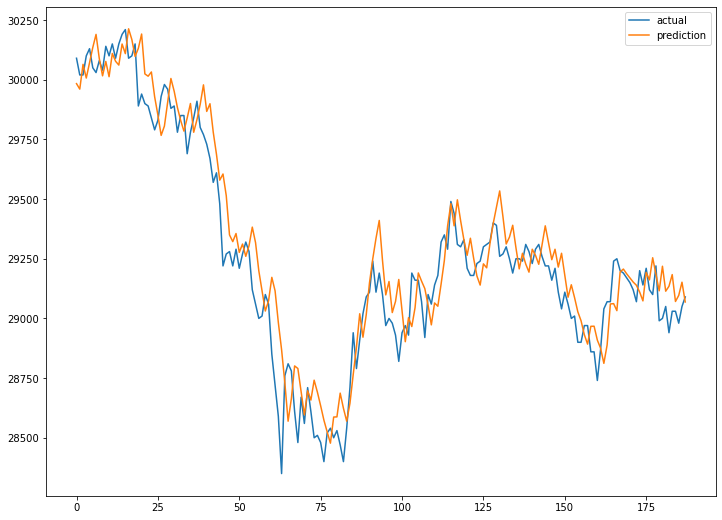

In [48]:
plt.figure(figsize=(12, 9))
plt.plot(test_price2, label='actual')
plt.plot(pred_price2, label='prediction')
plt.legend()
plt.show()

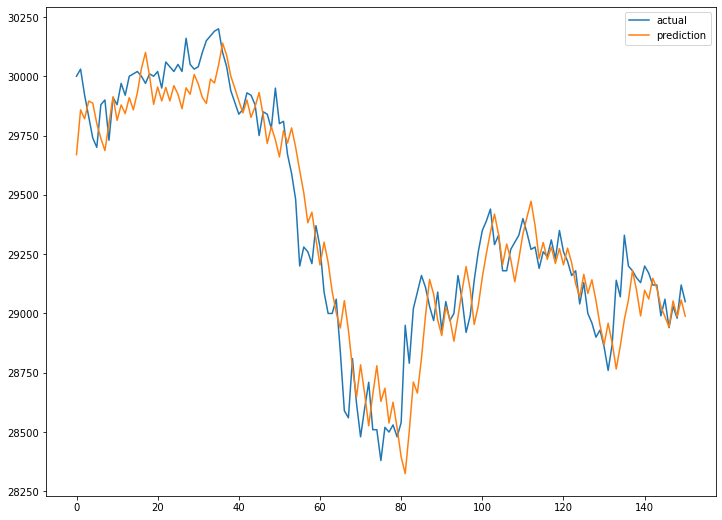

In [49]:
plt.figure(figsize=(12, 9))
plt.plot(test_price3, label='actual')
plt.plot(pred_price3, label='prediction')
plt.legend()
plt.show()

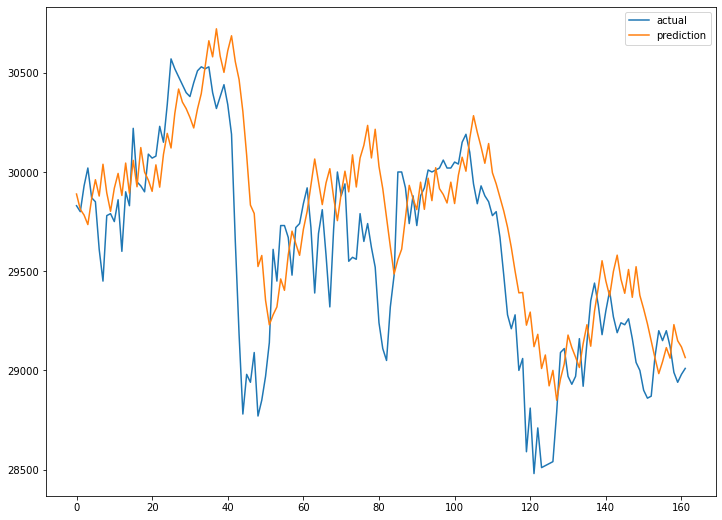

In [259]:
plt.figure(figsize=(12, 9))
plt.plot(test_price4, label='actual')
plt.plot(pred_price4, label='prediction')
plt.legend()
plt.show()

In [50]:
# dataframe ÎßåÎì§Í∏∞

In [25]:
valid_data=data[-(200-size_key):][['open','close']]

In [26]:
col=['pred_5','pred_10','pred_15','pred_30']
for c in col:
    valid_data[c]=np.nan

In [27]:
valid_data.head()

open    close  pred_5  pred_10  pred_15  pred_30
2022-01-10 02:15:00  29380.0  29480.0     NaN      NaN      NaN      NaN
2022-01-10 02:20:00  29470.0  29480.0     NaN      NaN      NaN      NaN
2022-01-10 02:25:00  29470.0  29470.0     NaN      NaN      NaN      NaN
2022-01-10 02:30:00  29460.0  29490.0     NaN      NaN      NaN      NaN
2022-01-10 02:35:00  29420.0  29380.0     NaN      NaN      NaN      NaN

In [28]:
def minmaxscaler_transform(data, scaler, scaler_l):
    scale_cols = ['open','line_5','line_10','band_mid','band_up','band_low','UD']
    df_scaled = scaler.transform(data[scale_cols])

    scale_cols_l = ['close']
    df_scaled_l = scaler_l.transform(data[scale_cols_l])

    df_scaled = pd.DataFrame(df_scaled)
    df_scaled.columns = scale_cols

    df_scaled_l = pd.DataFrame(df_scaled_l)
    df_scaled_l.columns = scale_cols_l
    
    return df_scaled, df_scaled_l

In [29]:
def model_predict_one(model, test_feature, result_train_x, scaler_l):
    pred = model.predict(result_train_x.values.reshape(1,test_feature[0].shape[0],test_feature[0].shape[1]))
    pred_price=scaler_l.inverse_transform(pred)
    return pred_price

In [30]:
def result_df(valid_data, start_s, tickers, scaler, scaler_l, model, test_feature, col='pred_5', cnt=45, num=1):
    for idex in valid_data.index:
        result_data=settings_data(start_s, tickers, idex, cnt, num)
        result_train_x, _ =minmaxscaler_transform(result_data, scaler, scaler_l)
        valid_data.loc[idex,col]=model_predict_one(model, test_feature, result_train_x, scaler_l)[0][0]
        time.sleep(0.1)
    return valid_data

In [31]:
valid_data=result_df(valid_data, start_settings, tickers_list[2], scaler, scaler_l, model, test_feature, col[0], size_key+20, 1)

In [32]:
valid_data=result_df(valid_data, start_settings2,tickers_list[2], scaler2, scaler_l2, model2, test_feature2, col[1], size_key2+20, 1)

In [33]:
valid_data=result_df(valid_data, start_settings3, tickers_list[2], scaler3, scaler_l3, model3, test_feature3, col[2], size_key3+20, 1)

In [34]:
valid_data=result_df(valid_data, start_settings4, tickers_list[2], scaler4, scaler_l4, model4, test_feature4, col[3], size_key4+20, 1)

In [231]:
valid_data.to_csv("coin_test.csv")

In [34]:
valid_data=pd.read_csv("coin_test.csv")

In [35]:
valid_data.set_index('Unnamed: 0', inplace=True)

In [166]:
# ÏàòÏùµÎ•† ÏòàÏ∏° ÌÖåÏä§Ìä∏ # backtracking
valid_data['check']=''
balance=700000
fee=0.0005
buy=False
start_price=[]
avg_price=0
comulative_rate=[]
cnt=20
watch=1
for i in range(len(valid_data.index)):
    idex=valid_data.index[i]
    
    # Î≥ÄÏàò Ìï†Îãπ
    temp=valid_data[['pred_5','pred_10','pred_15','pred_30']]
    temp=temp.iloc[i]
    rank_col1=sorted(temp.rank().items(), key=lambda x:x[1])[0][0]
    rank_col2=sorted(temp.rank().items(), key=lambda x:x[1])[1][0]
    rank_col3=sorted(temp.rank().items(), key=lambda x:x[1])[2][0]
    rank_col4=sorted(temp.rank().items(), key=lambda x:x[1])[3][0]
    rank_pf=valid_data.loc[idex,rank_col1]
    rank_ps=valid_data.loc[idex,rank_col2]
    rank_pt=valid_data.loc[idex,rank_col3]
    rank_pff=valid_data.loc[idex,rank_col4]
    valid_p5=valid_data.loc[idex,'pred_5']
    valid_p10=valid_data.loc[idex,'pred_10']
    valid_p15=valid_data.loc[idex,'pred_15']
    valid_p30=valid_data.loc[idex,'pred_30']
    
    # buy Íµ¨Í∞Ñrank_pf,rank_ps,rank_pt
    if valid_data.loc[idex,'open']<=rank_pff and valid_data.loc[idex,'open']<=rank_pt:
        if buy==False:
            start_price.append(valid_data.loc[idex,'open']*cnt)
            avg_price=sum(start_price)/len(start_price*cnt)
            balance-=np.round(valid_data.loc[idex,'open']*cnt*(1+fee),1)
            print("Îß§Ïàò ÌõÑ balance:", balance)
            buy=True
            valid_data.loc[idex,'check']='Îß§Ïàò'
        # Ï∂îÍ∞Ä buy Íµ¨Í∞Ñ
#         elif buy and avg_price>valid_data.loc[idex,'open']:
#             start_price.append(valid_data.loc[idex,'open']*cnt)
#             avg_price=sum(start_price)/len(start_price*cnt)
#             balance-=np.round(valid_data.loc[idex,'open']*cnt*(1+fee),1)
#             print("Îß§Ïàò ÌõÑ balance:", balance)
#             valid_data.loc[idex,'check']='Ï∂îÍ∞ÄÎß§Ïàò'
        
    else:
        # sell Íµ¨Í∞Ñ
        if valid_data.loc[idex,'open']>max(valid_p5,valid_p10,valid_p15,valid_p30) and buy:
            rate=(valid_data.loc[idex,'close']-avg_price)/avg_price
            balance+=np.round((valid_data.loc[idex,'close']*cnt*len(start_price))*(1-fee),1)
            buy=False
            max_count=len(start_price)
            start_price=[]
            comulative_rate.append(rate)
            valid_data.loc[idex,'check']='Îß§ÎèÑ:'+str(np.round(rate*100,3))+'%'
            print("buy:",np.round(avg_price,1), "sell:",valid_data.loc[idex,'close'], ">>> ÎÇ®ÏùÄ ÏûîÏï°:",np.round(balance,1), "ÏàòÏùµÎ•†:", np.round(rate*100,3),"%", "max_count:",max_count)
    if i%12==0:
        print(watch,"ÏãúÍ∞Ñ Í≤ΩÍ≥º >>> ÎÇ®ÏùÄ ÏûîÏï°:",sum(start_price)+np.round(balance,1))
        watch+=1
print("ÏµúÏ¢Ö >>> ÎÇ®ÏùÄ ÏûîÏï°:",sum(start_price)+np.round(balance,1), "ÎàÑÏ†ÅÏàòÏùµÎ•†:", np.round(np.mean(comulative_rate)*100,3),"%")

Îß§Ïàò ÌõÑ balance: 112106.19999999995
1 ÏãúÍ∞Ñ Í≤ΩÍ≥º >>> ÎÇ®ÏùÄ ÏûîÏï°: 699706.2
buy: 29380.0 sell: 29480.0 >>> ÎÇ®ÏùÄ ÏûîÏï°: 701411.4 ÏàòÏùµÎ•†: 0.34 % max_count: 1
Îß§Ïàò ÌõÑ balance: 111716.69999999995
buy: 29470.0 sell: 29340.0 >>> ÎÇ®ÏùÄ ÏûîÏï°: 698223.3 ÏàòÏùµÎ•†: -0.441 % max_count: 1
Îß§Ïàò ÌõÑ balance: 109128.8999999999
2 ÏãúÍ∞Ñ Í≤ΩÍ≥º >>> ÎÇ®ÏùÄ ÏûîÏï°: 697928.9
buy: 29440.0 sell: 29480.0 >>> ÎÇ®ÏùÄ ÏûîÏï°: 698434.1 ÏàòÏùµÎ•†: 0.136 % max_count: 1
Îß§Ïàò ÌõÑ balance: 109539.79999999981
3 ÏãúÍ∞Ñ Í≤ΩÍ≥º >>> ÎÇ®ÏùÄ ÏûîÏï°: 698139.8
buy: 29430.0 sell: 29430.0 >>> ÎÇ®ÏùÄ ÏûîÏï°: 697845.5 ÏàòÏùµÎ•†: 0.0 % max_count: 1
Îß§Ïàò ÌõÑ balance: 107550.49999999977
buy: 29500.0 sell: 29520.0 >>> ÎÇ®ÏùÄ ÏûîÏï°: 697655.3 ÏàòÏùµÎ•†: 0.068 % max_count: 1
Îß§Ïàò ÌõÑ balance: 106960.09999999986
buy: 29520.0 sell: 29560.0 >>> ÎÇ®ÏùÄ ÏûîÏï°: 697864.5 ÏàòÏùµÎ•†: 0.136 % max_count: 1
Îß§Ïàò ÌõÑ balance: 106368.8999999999
4 ÏãúÍ∞Ñ Í≤ΩÍ≥º >>> ÎÇ®ÏùÄ ÏûîÏï°: 697568.9
buy: 29560.0 sell: 29490.0 >>> ÎÇ

In [167]:
valid_data[:50]

open    close        pred_5       pred_10  \
2022-01-10 02:15:00  29380.0  29480.0  29382.693359  29407.902344   
2022-01-10 02:20:00  29470.0  29480.0  29354.328125  29407.902344   
2022-01-10 02:25:00  29470.0  29470.0  29470.531250  29519.791016   
2022-01-10 02:30:00  29460.0  29490.0  29409.130859  29519.791016   
2022-01-10 02:35:00  29420.0  29380.0  29375.585938  29451.681641   
2022-01-10 02:40:00  29340.0  29390.0  29343.894531  29451.681641   
2022-01-10 02:45:00  29390.0  29340.0  29301.070312  29360.169922   
2022-01-10 02:50:00  29370.0  29390.0  29401.248047  29360.169922   
2022-01-10 02:55:00  29390.0  29510.0  29317.474609  29422.218750   
2022-01-10 03:00:00  29510.0  29440.0  29386.820312  29422.218750   
2022-01-10 03:05:00  29440.0  29460.0  29440.457031  29537.117188   
2022-01-10 03:10:00  29460.0  29410.0  29371.681641  29537.117188   
2022-01-10 03:15:00  29400.0  29390.0  29450.171875  29456.648438   
2022-01-10 03:20:00  29430.0  29430.0  29378.716797  29456.648438   
2022-01-10 03:25:00  29420.0  29400.0  29462.437500  29396.232422   
2022-01-10 03:30:00  29500.0  29480.0  29393.216797  29396.232422   
2022-01-10 03:35:00  29430.0  29390.0  29487.652344  29495.533203   
2022-01-10 03:40:00  29390.0  29360.0  29410.609375  29495.533203   
2022-01-10 03:45:00  29390.0  29350.0  29361.201172  29414.240234   
2022-01-10 03:50:00  29390.0  29350.0  29329.943359  29414.240234   
2022-01-10 03:55:00  29350.0  29280.0  29303.666016  29362.888672   
2022-01-10 04:00:00  29280.0  29270.0  29268.777344  29362.888672   
2022-01-10 04:05:00  29270.0  29340.0  29221.970703  29284.382812   
2022-01-10 04:10:00  29310.0  29330.0  29179.498047  29284.382812   
2022-01-10 04:15:00  29330.0  29410.0  29284.384766  29345.277344   
2022-01-10 04:20:00  29410.0  29430.0  29315.648438  29345.277344   
2022-01-10 04:25:00  29470.0  29680.0  29353.259766  29441.933594   
2022-01-10 04:30:00  29680.0  29600.0  29401.417969  29441.933594   
2022-01-10 04:35:00  29590.0  29500.0  29490.970703  29624.328125   
2022-01-10 04:40:00  29500.0  29500.0  29449.134766  29624.328125   
2022-01-10 04:45:00  29580.0  29520.0  29416.837891  29545.166016   
2022-01-10 04:50:00  29520.0  29580.0  29541.859375  29545.166016   
2022-01-10 04:55:00  29580.0  29640.0  29476.523438  29610.613281   
2022-01-10 05:00:00  29620.0  29560.0  29568.246094  29610.613281   
2022-01-10 05:05:00  29560.0  29560.0  29612.908203  29695.429688   
2022-01-10 05:10:00  29580.0  29600.0  29539.251953  29695.429688   
2022-01-10 05:15:00  29600.0  29560.0  29611.679688  29612.787109   
2022-01-10 05:20:00  29560.0  29600.0  29649.550781  29612.787109   
2022-01-10 05:25:00  29550.0  29560.0  29572.404297  29549.337891   
2022-01-10 05:30:00  29560.0  29490.0  29523.585938  29549.337891   
2022-01-10 05:35:00  29510.0  29550.0  29615.076172  29503.781250   
2022-01-10 05:40:00  29550.0  29560.0  29526.927734  29503.781250   
2022-01-10 05:45:00  29500.0  29590.0  29600.839844  29477.365234   
2022-01-10 05:50:00  29580.0  29530.0  29513.039062  29477.365234   
2022-01-10 05:55:00  29530.0  29520.0  29594.576172  29562.041016   
2022-01-10 06:00:00  29510.0  29580.0  29514.960938  29562.041016   
2022-01-10 06:05:00  29580.0  29580.0  29467.386719  29511.960938   
2022-01-10 06:10:00  29580.0  29630.0  29570.599609  29511.960938   
2022-01-10 06:15:00  29590.0  29590.0  29503.367188  29600.029297   
2022-01-10 06:20:00  29570.0  29560.0  29581.880859  29600.029297   

                          pred_15       pred_30       check  pred_5UB  \
2022-01-10 02:15:00  29224.064453  29329.878906          Îß§Ïàò      True   
2022-01-10 02:20:00  29184.878906  29329.878906    Îß§ÎèÑ:0.34%     False   
2022-01-10 02:25:00  29184.878906  29329.878906          Îß§Ïàò     False   
2022-01-10 02:30:00  29184.878906  29329.878906                  True   
2022-01-10 02:35:00  29277.101562  29296.970703                 False   
2022-01-10 02:40:00  29277.101562  29296.970703       

In [118]:
# ÏòàÏ∏° Ï†ïÌôïÎèÑ ÌÖåÏä§Ìä∏
valid_data['pred_5UB']=False
valid_data['pred_10UB']=False
valid_data['pred_15UB']=False
valid_data['pred_30UB']=False
for i in range(len(valid_data.index)-1):
    idex=valid_data.index[i]
    fidex=valid_data.index[i+1]
    if valid_data.loc[idex,'open']>max(valid_data.loc[idex,'pred_5'],valid_data.loc[idex,'pred_10'],valid_data.loc[idex,'pred_15'],
                                      valid_data.loc[idex,'pred_30']):
#         if valid_data.loc[fidex,'open']<valid_data.loc[idex,'open']:
#             valid_data.loc[idex,'pred_5UB']=True
#         else:
        continue
    if valid_data.loc[idex,'open']<=max(valid_data.loc[idex,'pred_5'],valid_data.loc[idex,'pred_10'],valid_data.loc[idex,'pred_15'],
                                      valid_data.loc[idex,'pred_30']):
        if valid_data.loc[idex,'pred_5']<=valid_data.loc[fidex,'open']:
            valid_data.loc[idex,'pred_5UB']=True
        if valid_data.loc[idex,'pred_10']<=valid_data.loc[fidex,'open']:
            valid_data.loc[idex,'pred_10UB']=True
        if valid_data.loc[idex,'pred_15']<=valid_data.loc[fidex,'open']:
            valid_data.loc[idex,'pred_15UB']=True
        if valid_data.loc[idex,'pred_30']<=valid_data.loc[fidex,'open']:
            valid_data.loc[idex,'pred_30UB']=True

In [119]:
valid_data.head(20)

open    close        pred_5       pred_10  \
2022-01-10 02:15:00  29380.0  29480.0  29382.693359  29407.902344   
2022-01-10 02:20:00  29470.0  29480.0  29354.328125  29407.902344   
2022-01-10 02:25:00  29470.0  29470.0  29470.531250  29519.791016   
2022-01-10 02:30:00  29460.0  29490.0  29409.130859  29519.791016   
2022-01-10 02:35:00  29420.0  29380.0  29375.585938  29451.681641   
2022-01-10 02:40:00  29340.0  29390.0  29343.894531  29451.681641   
2022-01-10 02:45:00  29390.0  29340.0  29301.070312  29360.169922   
2022-01-10 02:50:00  29370.0  29390.0  29401.248047  29360.169922   
2022-01-10 02:55:00  29390.0  29510.0  29317.474609  29422.218750   
2022-01-10 03:00:00  29510.0  29440.0  29386.820312  29422.218750   
2022-01-10 03:05:00  29440.0  29460.0  29440.457031  29537.117188   
2022-01-10 03:10:00  29460.0  29410.0  29371.681641  29537.117188   
2022-01-10 03:15:00  29400.0  29390.0  29450.171875  29456.648438   
2022-01-10 03:20:00  29430.0  29430.0  29378.716797  29456.648438   
2022-01-10 03:25:00  29420.0  29400.0  29462.437500  29396.232422   
2022-01-10 03:30:00  29500.0  29480.0  29393.216797  29396.232422   
2022-01-10 03:35:00  29430.0  29390.0  29487.652344  29495.533203   
2022-01-10 03:40:00  29390.0  29360.0  29410.609375  29495.533203   
2022-01-10 03:45:00  29390.0  29350.0  29361.201172  29414.240234   
2022-01-10 03:50:00  29390.0  29350.0  29329.943359  29414.240234   

                          pred_15       pred_30       check  pred_5UB  \
2022-01-10 02:15:00  29224.064453  29329.878906          Îß§Ïàò      True   
2022-01-10 02:20:00  29184.878906  29329.878906   Îß§ÎèÑ:0.306%     False   
2022-01-10 02:25:00  29184.878906  29329.878906          Îß§Ïàò     False   
2022-01-10 02:30:00  29184.878906  29329.878906                  True   
2022-01-10 02:35:00  29277.101562  29296.970703                 False   
2022-01-10 02:40:00  29277.101562  29296.970703                  True   
2022-01-10 02:45:00  29277.101562  29296.970703  Îß§ÎèÑ:-0.271%     False   
2022-01-10 02:50:00  29265.767578  29296.970703                 False   
2022-01-10 02:55:00  29265.767578  29296.970703                  True   
2022-01-10 03:00:00  29265.767578  29296.970703                 False   
2022-01-10 03:05:00  29369.367188  29472.361328          Îß§Ïàò      True   
2022-01-10 03:10:00  29369.367188  29472.361328                  True   
2022-01-10 03:15:00  29369.367188  29472.361328                 False   
2022-01-10 03:20:00  29346.523438  29472.361328                  True   
2022-01-10 03:25:00  29346.523438  29472.361328                  True   
2022-01-10 03:30:00  29346.523438  29472.361328   Îß§ÎèÑ:0.204%     False   
2022-01-10 03:35:00  29431.380859  29399.861328          Îß§Ïàò     False   
2022-01-10 03:40:00  29431.380859  29399.861328                 False   
2022-01-10 03:45:00  29431.380859  29399.861328                  True   
2022-01-10 03:50:00  29392.458984  29399.861328                  True   

                     pred_10UB  pred_15UB  pred_30UB  
2022-01-10 02:15:00       True       True       True  
2022-01-10 02:20:00      False      False      False  
2022-01-10 02:25:00      False       True       True  
2022-01-10 02:30:00      False       True       True  
2022-01-10 02:35:00      False       True       True  
2022-01-10 02:40:00      False       True       True  
2022-01-10 02:45:00      False      False      False  
2022-01-10 02:50:00       True       True       True  
2022-01-10 02:55:00       True       True       True  
2022-01-10 03:00:00      False      False      False  
2022-01-10 03:05:00      False       True      False  
2022-01-10 03:10:00      False       True      False  
2022-01-10 03:15:00      False       True      False  
2022-01-10 03:20:00      False       True      False  
2022-01-10 03:25:00       True       True       True  
2022-01-10 03:30:00      False      False      False  
2022-01-10 03:35:00      False      False      False  
2022-01-10 03:40:00   

In [120]:
sum((valid_data['pred_5UB']==True))/(len(valid_data)-1)

0.592814371257485

In [121]:
sum((valid_data['pred_10UB']==True))/(len(valid_data)-2)

0.3433734939759036

In [122]:
sum((valid_data['pred_15UB']==True))/(len(valid_data)-3)

0.5696969696969697

In [123]:
sum((valid_data['pred_30UB']==True))/(len(valid_data)-6)

0.22839506172839505

In [124]:
cntt=0
for idex in valid_data.index:
    if valid_data.loc[idex,'pred_5UB'] or valid_data.loc[idex,'pred_10UB'] or valid_data.loc[idex,'pred_15UB'] or valid_data.loc[idex,'pred_30UB']:
        cntt+=1

In [125]:
cntt/(len(valid_data)-6)

0.7839506172839507

In [70]:
temp=valid_data[['pred_5','pred_10','pred_15','pred_30']]
temp=temp.iloc[0]


pred_5     3.0
pred_10    4.0
pred_15    1.0
pred_30    2.0
Name: 2022-01-10 02:15:00, dtype: float64

In [79]:
sorted(temp.rank().items(), key=lambda x:x[1])[0][0]

'pred_15'

In [75]:
temp.rank().items()

In [54]:
# Ìä∏ÏúÑÌÑ∞ ÌôúÏö©ÌïòÍ∏∞
import tweepy

In [55]:
# Ìä∏ÏúÑÌÑ∞ api key
API_Key='80RNVNLQWrwPOcolCZd1bRUEh'
secret_Key='6E4IdJLXUifXdrpwOkAjtG5pdKFmB7EP1ALnAdDTsfPPfeV24V'
bearer_Token='AAAAAAAAAAAAAAAAAAAAABH9XgEAAAAAajipuF2UJm%2BYMhF1GsIAMkwUqso%3D2aALA5qjG7sTYW0WzVJqetrzZNH9cU3qB7WhVIN0BqtTk2N1YJ'
access_token_key='1478324496855875584-oWOWjfqmDZ0vel1580ucvtjPBvjhGQ'
access_token_secret='m5bwyHzwoU76IgiaM8KeRYI6enB9WFxcPVQxACdXsApsK'

In [56]:
auth=tweepy.OAuthHandler(API_Key, secret_Key)
auth.set_access_token(access_token_key, access_token_secret)
twitter_api = tweepy.API(auth)

In [57]:
# ÎÇ†Ïßú Ïù¥ÌõÑÎ°ú keyword Í≤ÄÏÉâÌïòÍ∏∞
valid_data.index[0]

Timestamp('2022-01-07 08:15:00')

In [58]:
valid_data.index[-1]

Timestamp('2022-01-08 00:00:00')

In [59]:
korea_geo = "%s,%s,%s" % ("35.95", "128.25", "1000km")
keyword = "etc"
cursor=tweepy.Cursor(twitter_api.search, q=keyword, geocode=korea_geo).items(10)

In [134]:
for tweet in cursor:
    print(tweet.created_at)
    print("text:",tweet.text)
    time.sleep(0.1)

2022-01-07 08:19:13
text: @foxy_moonflower Pour l‚Äôheure, j‚Äôavais vu √† Tokyo une japonaise qui avait invit√©e un ami (ou petit ami) chez elle,‚Ä¶ https://t.co/pFE9aUlS0F
2022-01-07 08:19:02
text: ÏöîÏ¶ò Ïù¥ ÏßëÏïà ÏãùÍµ¨Îì§ Ï≠âÎ¥êÎ¥ê.
ÎÇòÏïº ÎäòÎ¥ê Îã§ ÏïåÍ∏∞Í≥†

Ï†ÑÎ∂ÄÎã§ ÎßùÌïòÍ≥† ÎßùÍ∞ÄÏßÄÍ≥† Ïñ¥Îç∞ÌïòÎÇò ÏÑ±ÌïúÎç∞Í∞Ä ÏûàÎäîÏßÄ.

ÎßàÏπò ÏòàÏ†ÑÏùò Íµ≠Í∞ÄÍ∂åÎ†•Ïùò Í≥µÏûë,ÎÜçÍ∞ÑÏóê ÌïúÏßëÏïàÏù¥ ÌíçÎπÑÎ∞ïÏÇ∞ ÎÇò 
Îã§ Ï£ΩÍ≥† ÎßùÌïòÍ≥† Î∂àÌñâÏóêÎπ†ÏßÑ

"ÏàòÏßÄ ÍπÄ"ÏÇ¨‚Ä¶ https://t.co/HqxqrnBIMe
2022-01-07 08:18:26
text: Lover, and Giuk's character misses his mom bc she's far away, etc etc; which makes all of them a memory that they m‚Ä¶ https://t.co/fAcNXgoZ0i
2022-01-07 08:17:27
text: If you've ever wanted to see a pro futsal game, next week's F.League match between YSCC &amp; Tachikawa/Fuchu Athletic‚Ä¶ https://t.co/Ri9V6boqNv
2022-01-07 08:15:11
text: üöÑ #ETH and 28 Others,  üü¢ 29

üá∞üá∑ 44.78ÏñµÏõê
üá∫üá∏ $3,832,050
üáØüáµ ¬•420,906,125
üá™üá∫ ‚Ç¨3,243,367
üá®üá≥ 24

In [202]:
valid_data[70:90]

open    close        pred_5       pred_10  \
Unnamed: 0                                                          
2022-01-05 16:05:00  42160.0  42180.0  42178.289062  42096.183594   
2022-01-05 16:10:00  42190.0  42230.0  42199.875000  42096.183594   
2022-01-05 16:15:00  42220.0  42210.0  42233.636719  42139.476562   
2022-01-05 16:20:00  42190.0  42230.0  42227.167969  42139.476562   
2022-01-05 16:25:00  42230.0  42190.0  42247.699219  42166.269531   
2022-01-05 16:30:00  42190.0  42150.0  42223.375000  42166.269531   
2022-01-05 16:35:00  42140.0  42120.0  42170.605469  42157.230469   
2022-01-05 16:40:00  42120.0  42120.0  42146.445312  42157.230469   
2022-01-05 16:45:00  42120.0  42100.0  42137.148438  42124.238281   
2022-01-05 16:50:00  42110.0  42130.0  42132.031250  42124.238281   
2022-01-05 16:55:00  42130.0  42110.0  42154.328125  42110.535156   
2022-01-05 17:00:00  42110.0  42060.0  42147.402344  42110.535156   
2022-01-05 17:05:00  42050.0  42030.0  42103.437500  42083.523438   
2022-01-05 17:10:00  42030.0  42030.0  42055.761719  42083.523438   
2022-01-05 17:15:00  42040.0  42040.0  42052.761719  42043.656250   
2022-01-05 17:20:00  42040.0  42030.0  42068.242188  42043.656250   
2022-01-05 17:25:00  42030.0  42000.0  42038.675781  42020.214844   
2022-01-05 17:30:00  42000.0  42030.0  42052.492188  42020.214844   
2022-01-05 17:35:00  42030.0  42050.0  42057.218750  42003.078125   
2022-01-05 17:40:00  42050.0  42130.0  42055.597656  42003.078125   

                          pred_15   p_5   p_10   p_15     UB  
Unnamed: 0                                                    
2022-01-05 16:05:00  42140.714844  True  False  False   True  
2022-01-05 16:10:00  42140.714844  True  False  False   True  
2022-01-05 16:15:00  42140.714844  True  False  False   True  
2022-01-05 16:20:00  42190.507812  True  False   True  False  
2022-01-05 16:25:00  42190.507812  True  False  False   True  
2022-01-05 16:30:00  42190.507812  True  False   True  False  
2022-01-05 16:35:00  42165.585938  True   True   True  False  
2022-01-05 16:40:00  42165.585938  True   True   True  False  
2022-01-05 16:45:00  42165.585938  True   True   True  False  
2022-01-05 16:50:00  42128.156250  True   True   True  False  
2022-01-05 16:55:00  42128.156250  True  False  False   True  
2022-01-05 17:00:00  42128.156250  True   True   True  False  
2022-01-05 17:05:00  42089.390625  True   True   True  False  
2022-01-05 17:10:00  42089.390625  True   True   True  False  
2022-01-05 17:15:00  42089.390625  True   True   True   True  
2022-01-05 17:20:00  42046.128906  True   True   True  False  
2022-01-05 17:25:00  42046.128906  True  False   True  False  
2022-01-05 17:30:00  42046.128906  True   True   True  False  
2022-01-05 17:35:00  42057.078125  True  False   True   True  
2022-01-05 17:40:00  42057.078125  True  False   True   True